# 비선형모델인 신경망(neural network)을 배워보자
## (이전까지 데이터를 선형모델로 해석하는 방법을 배웠다. )

# 1. 신경망을 수식으로 분해해보자

- 행렬O의 각행벡터(Oi)는 하나의 점을 나타내는 행벡터들로 이루어진 X행렬과 가중치 행렬(W) 사이의 행렬곱과 절편 b벡터의 합으로 표현된다고 가정하자
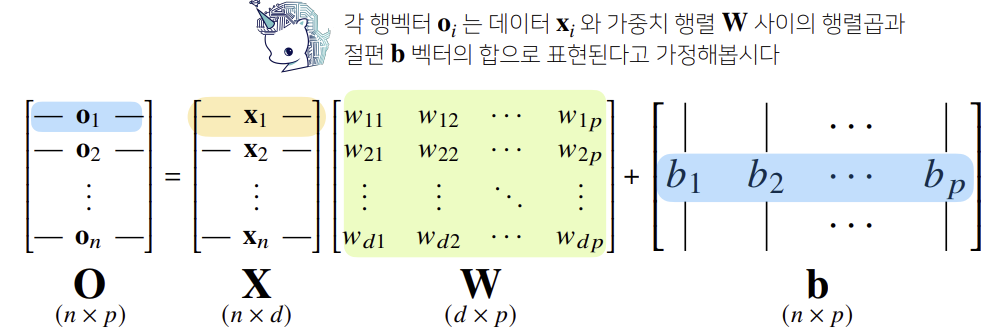

- x라는 변수들을 o라는 변수들로 연결을 하게 될 때,
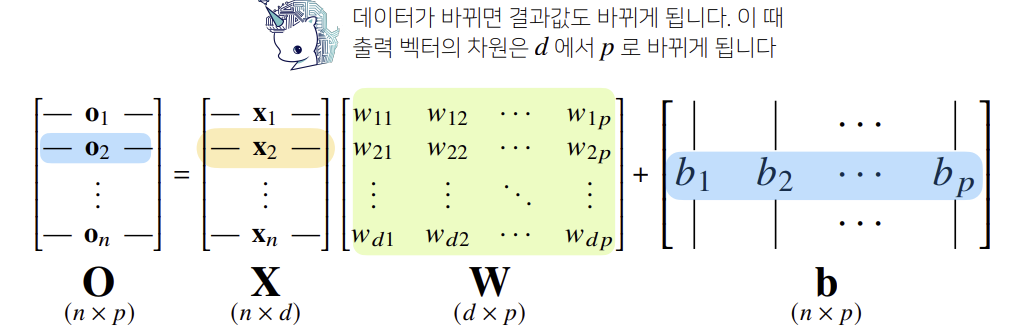

- 화살표가 W 즉, 가중치가 된다.

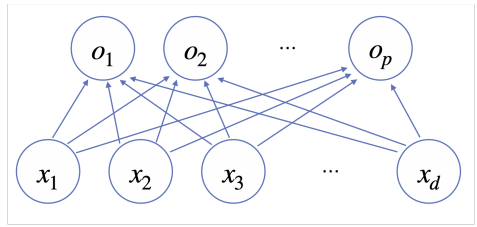

# 2. 소프트맥스 연산
## 분류 문제를 풀 때, 특정 클래스에 속할 확률을 구할때 사용한다.
- 선형모델의 결과를 소프트맥스연산을 취함으로써 벡터를 확률벡터로 변환해주어 특정 클래스에 속할 확률을 구한다.
- 지수함수이기 떄문에, 오버프로우가 일어날 것을 방지하여 max값을 빼주고 진행하면 softmax와 동일한 효과도 내고 오버플로우도 방지가능
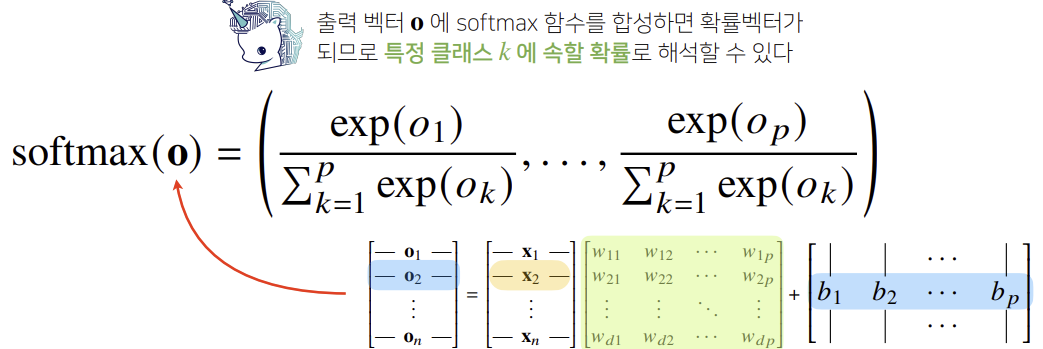

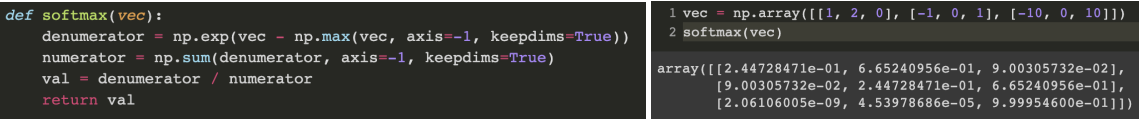

### 2-1. 벡터를 확률벡터로 나타낸다.
#### [1,2,0] -> [0.24, 0.67, 0.09] 

In [3]:
import numpy as np
def softmax(vec): # 벡터가 주어졌을때
    denumerator = np.exp(vec - np.max(vec, axis=-1, keepdims=True))
    numerator = np.sum(denumerator, axis=-1, keepdims=True)
    val = denumerator / numerator
    return val

vec = np.array([[1,2,0]
               ,[-1,0,1]
               ,[-10,0,10]])
softmax(vec) 

array([[2.44728471e-01, 6.65240956e-01, 9.00305732e-02],
       [9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

### 2-2.원-핫(one-hot) 벡터
#### 추론을 할 떄는 소프트맥스 연산이 아니라 원-핫벡터로 최대값을 가진 주소만 1로 출력하는 연산을 사용한다.

### 2-3. 활성화함수
- 비선형함수로써 선형모델로 나오게되는 각각의 원소에 적용을한다.
- 소프트맥스는 출력물의 모든 값을 다 고려해서 출력을 하지만, 활성화함수는 다른 주소에 있는 출력값을 고려하지 않고, 주소에 해당하는 출력값만 고려한다. 즉, 벡터를 input으로 받지않고 하나의 실수값만 받고 진행한다.
- 선형모델로 나온 모델을 비선형모델로 변형시킬 수 있고, 이러한 벡터를 <font color='blue'>잠재벡터</font> 혹은 <font color='blue'>히든벡터</font> 라고 부르며, 이러한 벡터들을 뉴런이라고 부르게된다.
- 이러한 뉴런으로 이루어진게 뉴럴네트워크라한다.

* 선형모델로 나온 출력물을 활성화함수로 한번 쓰위게 된 뉴럴네트워크를 역사적으로 퍼셉트론이라고 부른다.
* <font color='red'>활성화 함수를 사용하지 않으면 딥러닝은 선형모형과 차이가 없다. </font>
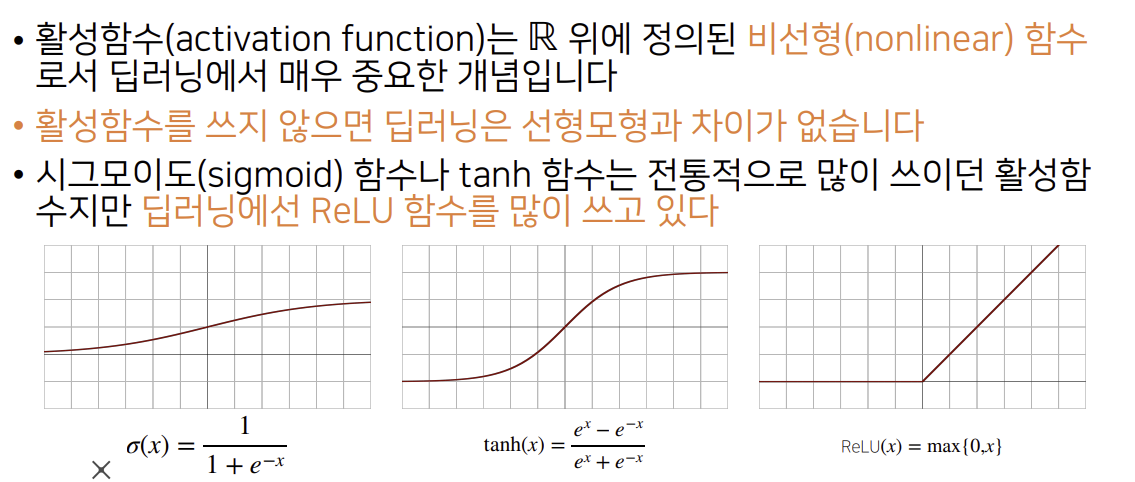


- 신경망은 선형모델과 활성함수(activation function을 합성한 함수이다.
### 2-4. 2층(2-layers) 신경망이란
- 쉽게말해서 가중치행렬이 2개 등장하기 때문이다.

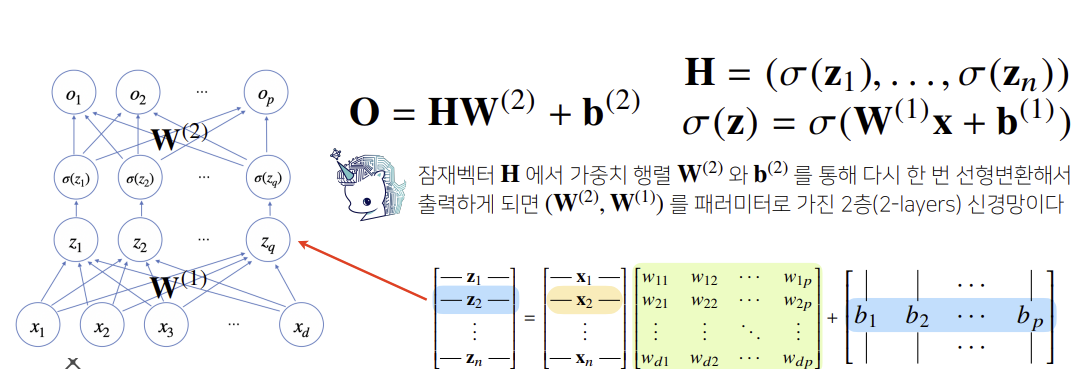

# 선형모델과 활성함수를 반복적으로 사용하는것이 오늘날 사용하는 딥러닝의 가장 기본적인 모형이다

### 2-5. 다층(multi-layer) 퍼셉트론 (MLP) 신경망이 여러층 합성된 함수이다.
- 신경망은 선형모델과 활성함수(activation function)를 합성한 함수이다.

1. x를 입력으로 받아 W1이라는 가중치행렬을 통해 z로 보내고
2. 그 z를 활성함수를 씌워서 H라는 히든벡터로 보낸다.
    - z에 해당하는 모든변수에 시그마를 씌운 행렬. H라는 성분은 Z라는 구성원소에 활성화함수를 씌운것
3. 1,2를 반복
4. 이러한 순차적인 신경망 계산을 순전파(forward propagation)라 부른다.
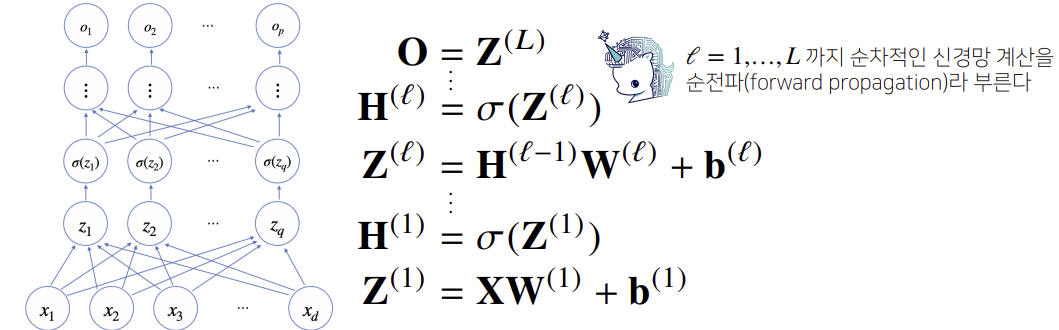

###  2-6. universal approximation theroem
- 이론적으로는 2층 신경망으로도 임의의 연속함수를 근사할 수 있다. -> 이론적으로만 가능하지 실제로는 좀 어려운듯?
- 그러나 층이 깊을수록 목적함수를 근사하는데 필요한 뉴런(노드)의 숫자가 훨씬 빨리 줄어들어 좀 더 효율적으로 학습이 가능하다.
    - 층이 얇으면 필요한 뉴런의 숫자가 기하급수적으로 늘어나서 넓은(wide)신경망이 되어야 한다.

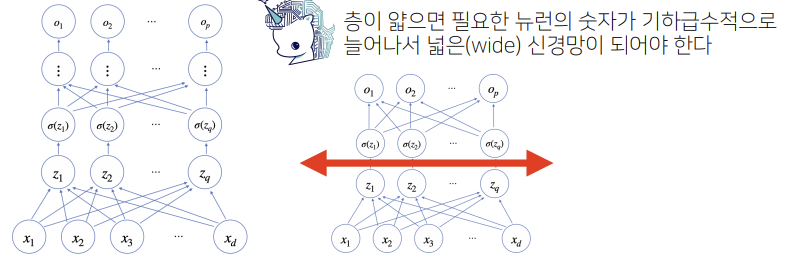

- 층이 깊어질수록 최적화가 되는건 아니다. 

# 딥러닝에서 층을 여러개 쌓는 이유는? 좀 더 적은 뉴런과 노드를 가지고도 복잡한 패턴을 사용할 수 있기 때문에

# 3. 역전파(backpropagation)
### 순차적인 신경망 계산을 순전파(forward propagation)라 부른다. 즉, x라는 입력을 받아서 선형모델과 활성함수를 순차적으로 적용하는거
### 선형모델의 의 경우, 경사하강법을 적용할 때 한층에서 계산하는 원리이기떄문에 gradient vector를 동시에 계산할 수 있지만, 딥러닝은 순차적으로 각 층별로 쌓아서 계산을 하기때문에 한번에 계산할 수 없고, gradient vector를 구하려면역전파알고리즘을 이용하여 역순으로 순차적으로 한번씩 계산을 해줘야한다.

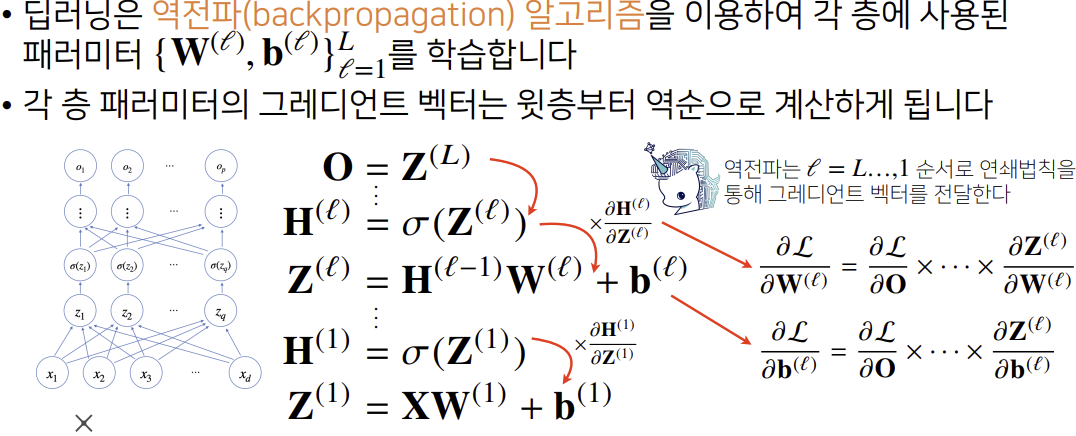

### 3-1. 딥러닝은 출력에서부터 연쇄법칙을 통해서 gradient를 밑층으로 보내서 순차적으로 계산해야한다.
- 연쇄법칙: 합성함수를 미분하는 법칙
- 역전파 알고리즘은 합성함수 미분법인 연쇄법칙(chaine-rule) 기반 자동미분(auto-differentiation)을 사용한다.

### 3-2. 역전파 원리 이해하기 
- 미분을 사용하기때문에 forward propagation보다 메모리사용이 많음
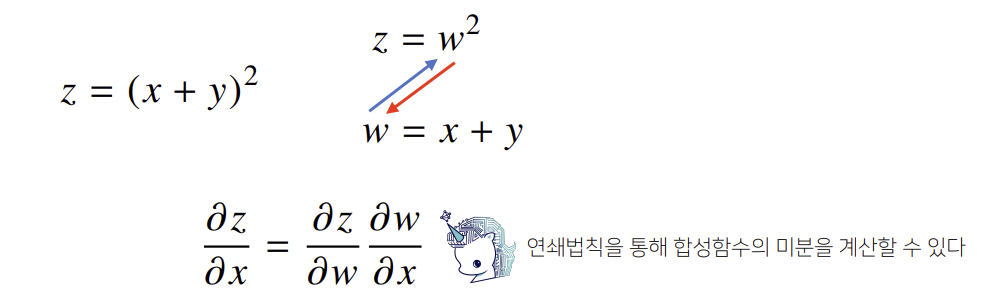

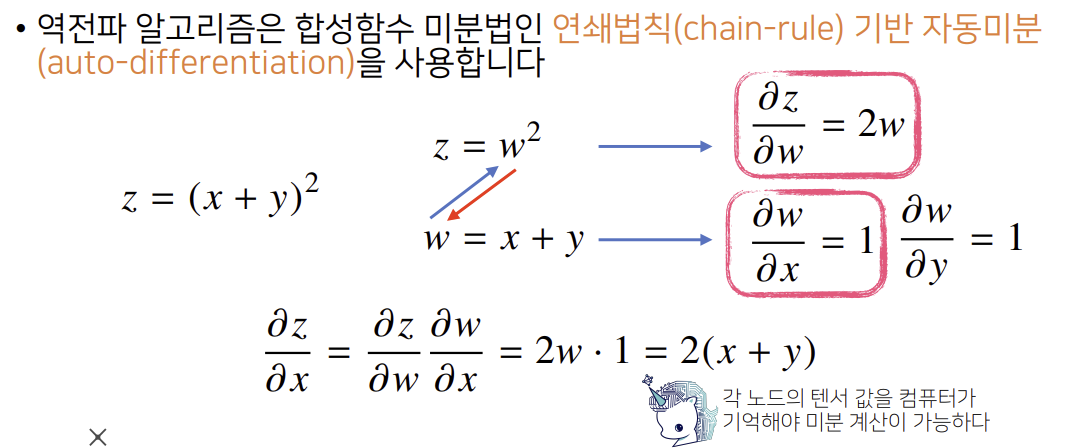

### 3-3. 2층 신경망의 역전파 이해하기
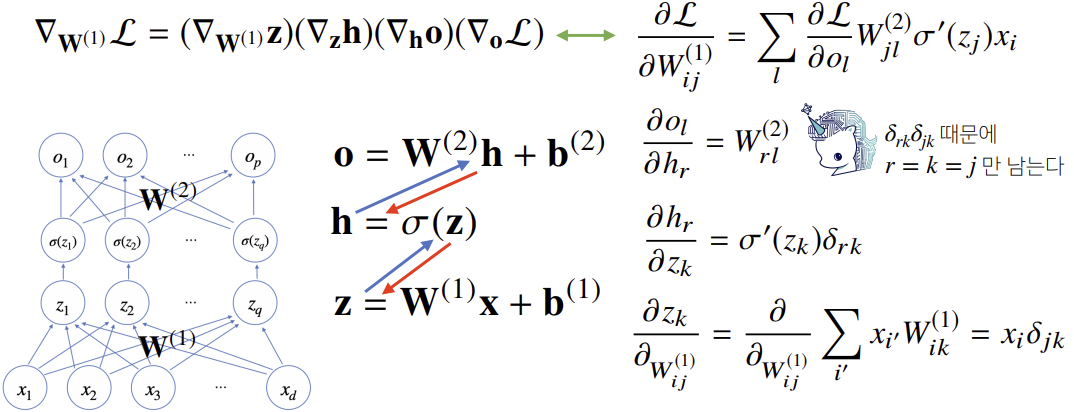

# 딥러닝의 학습원리는 순전파와 역전파. 역전파의 중요한 원리는 연쇄법칙. 
# 딥러닝은 선형모델 활성함수들의 여러층에 대한 합성함수다. 
# 합성함수이다보니 gradient를 계산하려면 연쇄법칙인 chain rule 필요한것이고, chain rule을 적용한 합습방법 알고리즘인 역전파(back propagation)을 쓴다.